# Student Performance Factors

# Imports

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline

# Functions

In [27]:
def check_nulls_dupes(df):
  print(f"Number of Nulls: {df.isna().sum()}")
  print(f"Number of Duplicates: {df.duplicated().sum()}")

def check_class_imbalance(target):
  unique, counts = np.unique(target, return_counts=True)
  
  plt.figure(figsize=(10, 7))
  plt.pie(counts, labels=unique, startangle=140, autopct="%1.1f%%")
  plt.title("Target Class Breakdown")
  plt.legend()
  plt.show()

def plot_distribution(df, dist_type):
  
  plt.figure(figsize=(16, 16))
  rows = len(df.columns)
  dims = (rows+ 4)//3
  
  for idx, col in enumerate(df.columns):
    plt.subplot(dims, 4, idx+1)
    sns.histplot(df[col], kde=True) if dist_type == "hist" else sns.boxplot(df[col])
    plt.title(f"Distirbution of {col}") if dist_type == "hist" else plt.title(f"Boxplot of {col}")
  plt.tight_layout()
  plt.show()

def mapping_function(val):
  grade = None
  if val >=90:
    grade = "A"
  elif val >= 80 and val <=90:
    grade = "B"
  elif val>= 70 and val <=79:
    grade = "C"
  elif val >=60 and val<=69:
    grade = "D"
  else:
    grade = "F"

  return grade

# EDA Analysis

In [18]:
df = pd.read_csv("/Users/maukanmir/Downloads/data.csv")
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [19]:
df.dtypes

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

In [20]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


# Nulls & Dupes

In [21]:
check_nulls_dupes(df)

Number of Nulls: Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64
Number of Duplicates: 0


In [22]:
df.dropna(inplace=True)

# Separate Categorical and Continuous variables

In [23]:
categorical_types = df.select_dtypes(include="object")
numeric_types = df.select_dtypes(exclude="object")

Parental_Involvement


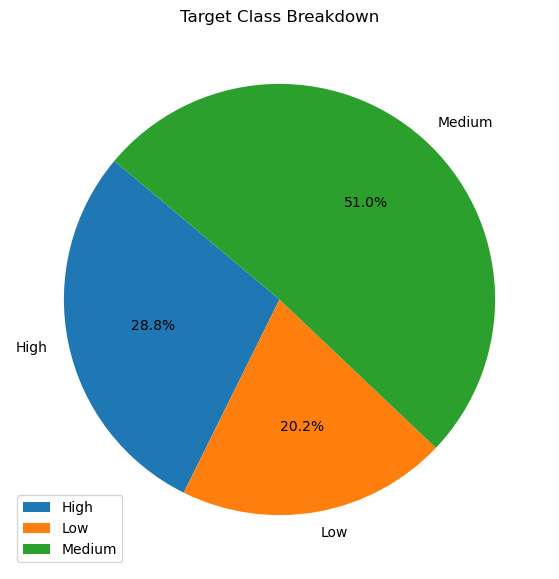

Access_to_Resources


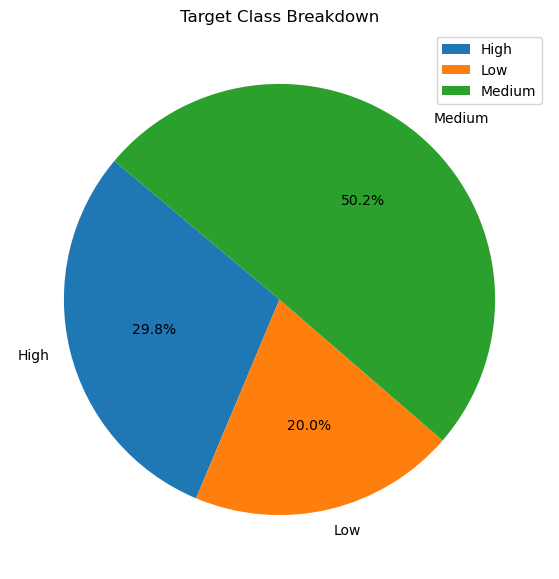

Extracurricular_Activities


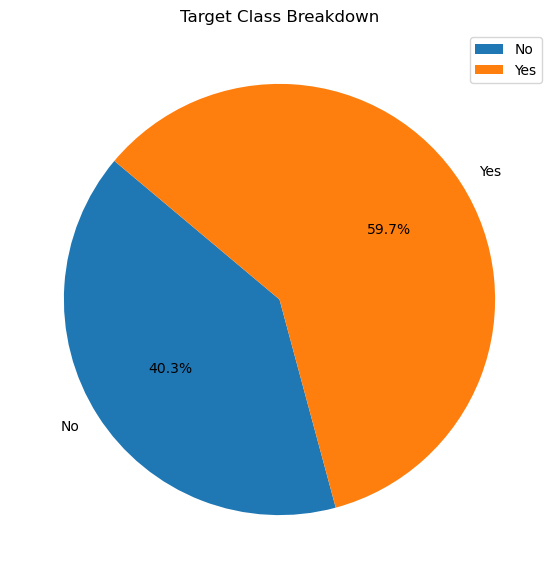

Motivation_Level


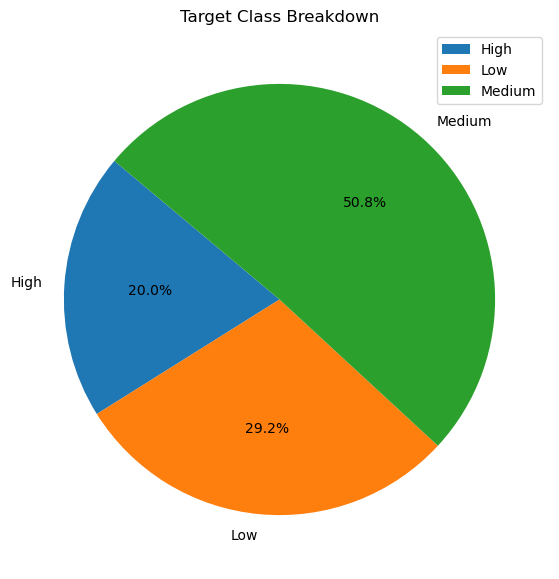

Internet_Access


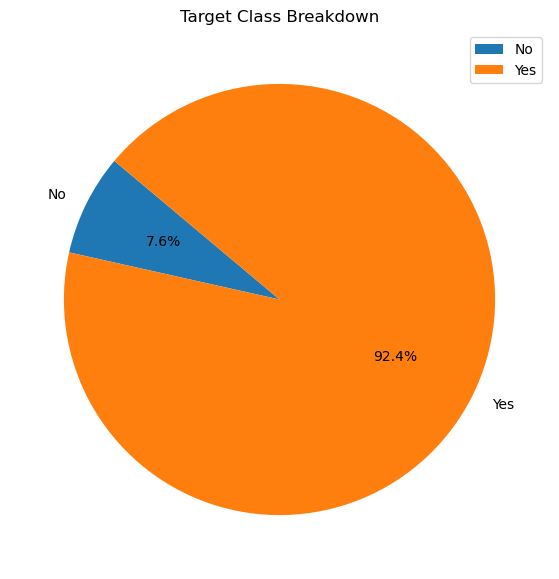

Family_Income


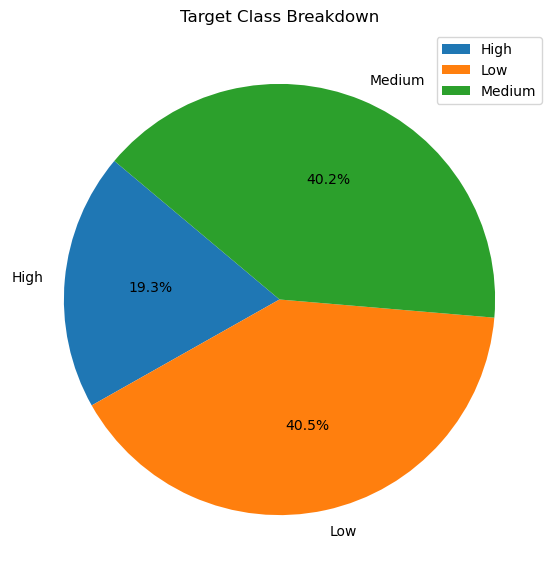

Teacher_Quality


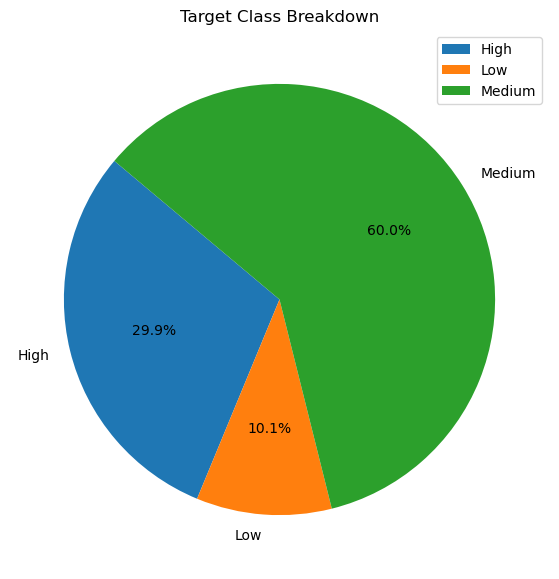

School_Type


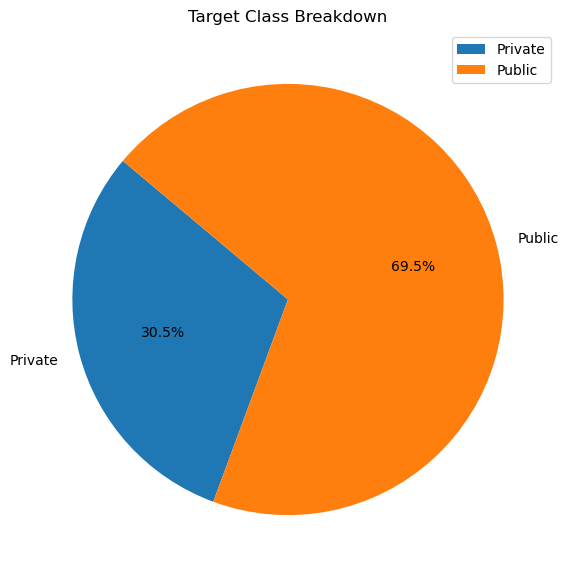

Peer_Influence


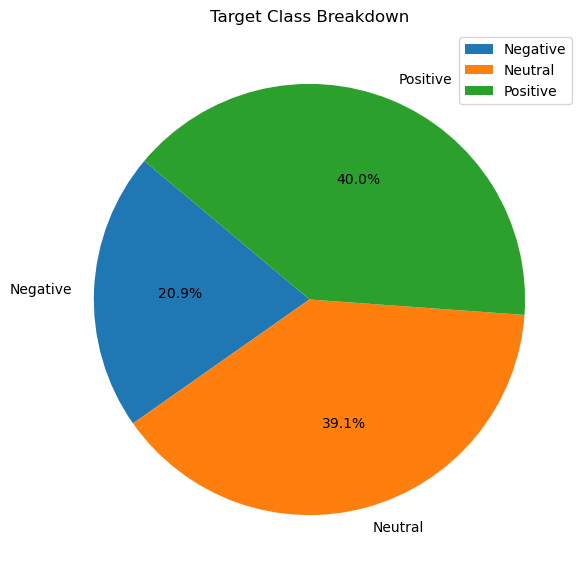

Learning_Disabilities


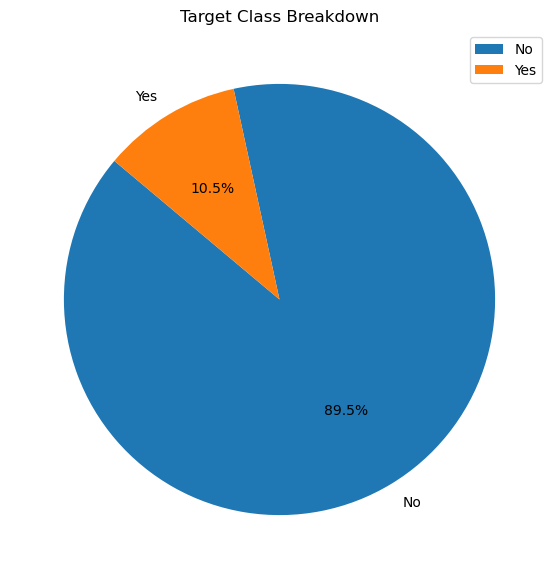

Parental_Education_Level


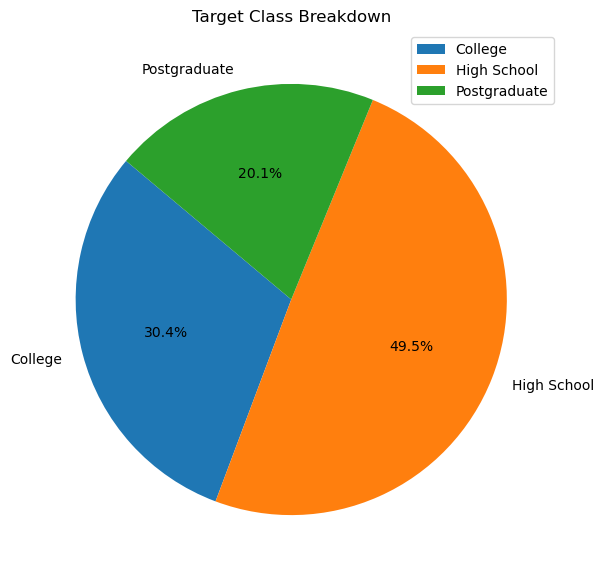

Distance_from_Home


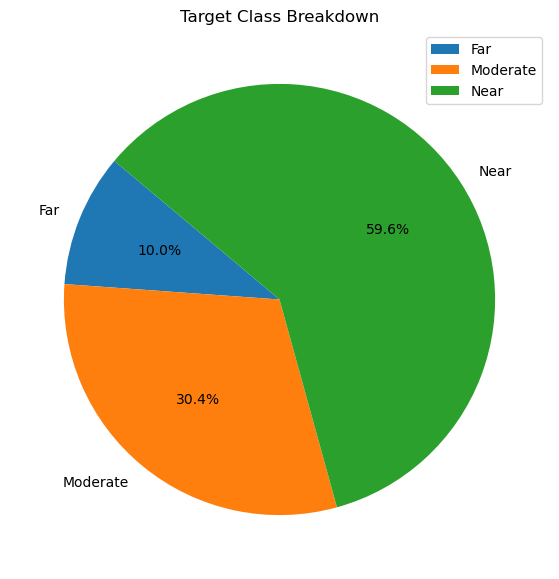

Gender


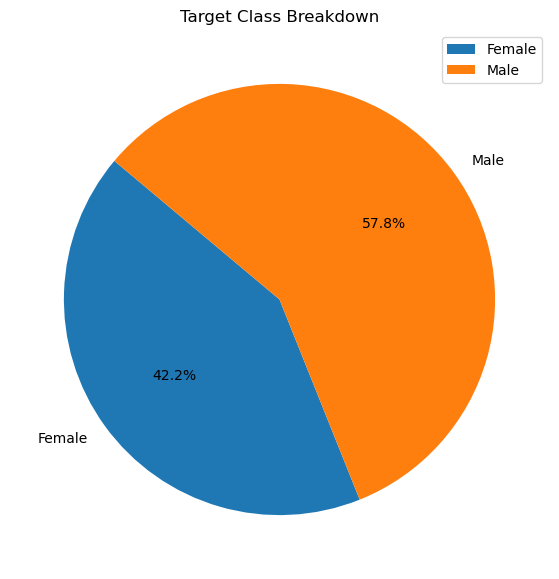

In [24]:
for col in categorical_types.columns:
  print(f"{col}")
  check_class_imbalance(categorical_types[col])

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
0,23,84,7,73,0,3,67
1,19,64,8,59,2,4,61
2,24,98,7,91,2,4,74
3,29,89,8,98,1,4,71
4,19,92,6,65,3,4,70
...,...,...,...,...,...,...,...
6602,25,69,7,76,1,2,68
6603,23,76,8,81,3,2,69
6604,20,90,6,65,3,2,68
6605,10,86,6,91,2,3,68


In [28]:
categorical_types

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,Low,High,No,Low,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
1,Low,Medium,No,Low,Yes,Medium,Medium,Public,Negative,No,College,Moderate,Female
2,Medium,Medium,Yes,Medium,Yes,Medium,Medium,Public,Neutral,No,Postgraduate,Near,Male
3,Low,Medium,Yes,Medium,Yes,Medium,Medium,Public,Negative,No,High School,Moderate,Male
4,Medium,Medium,Yes,Medium,Yes,Medium,High,Public,Neutral,No,College,Near,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,High,Medium,No,Medium,Yes,High,Medium,Public,Positive,No,High School,Near,Female
6603,High,Medium,No,Medium,Yes,Low,High,Public,Positive,No,High School,Near,Female
6604,Medium,Low,Yes,Low,Yes,Low,Medium,Public,Negative,No,Postgraduate,Near,Female
6605,High,High,Yes,High,Yes,Low,Medium,Private,Positive,No,High School,Far,Female


# Histogram

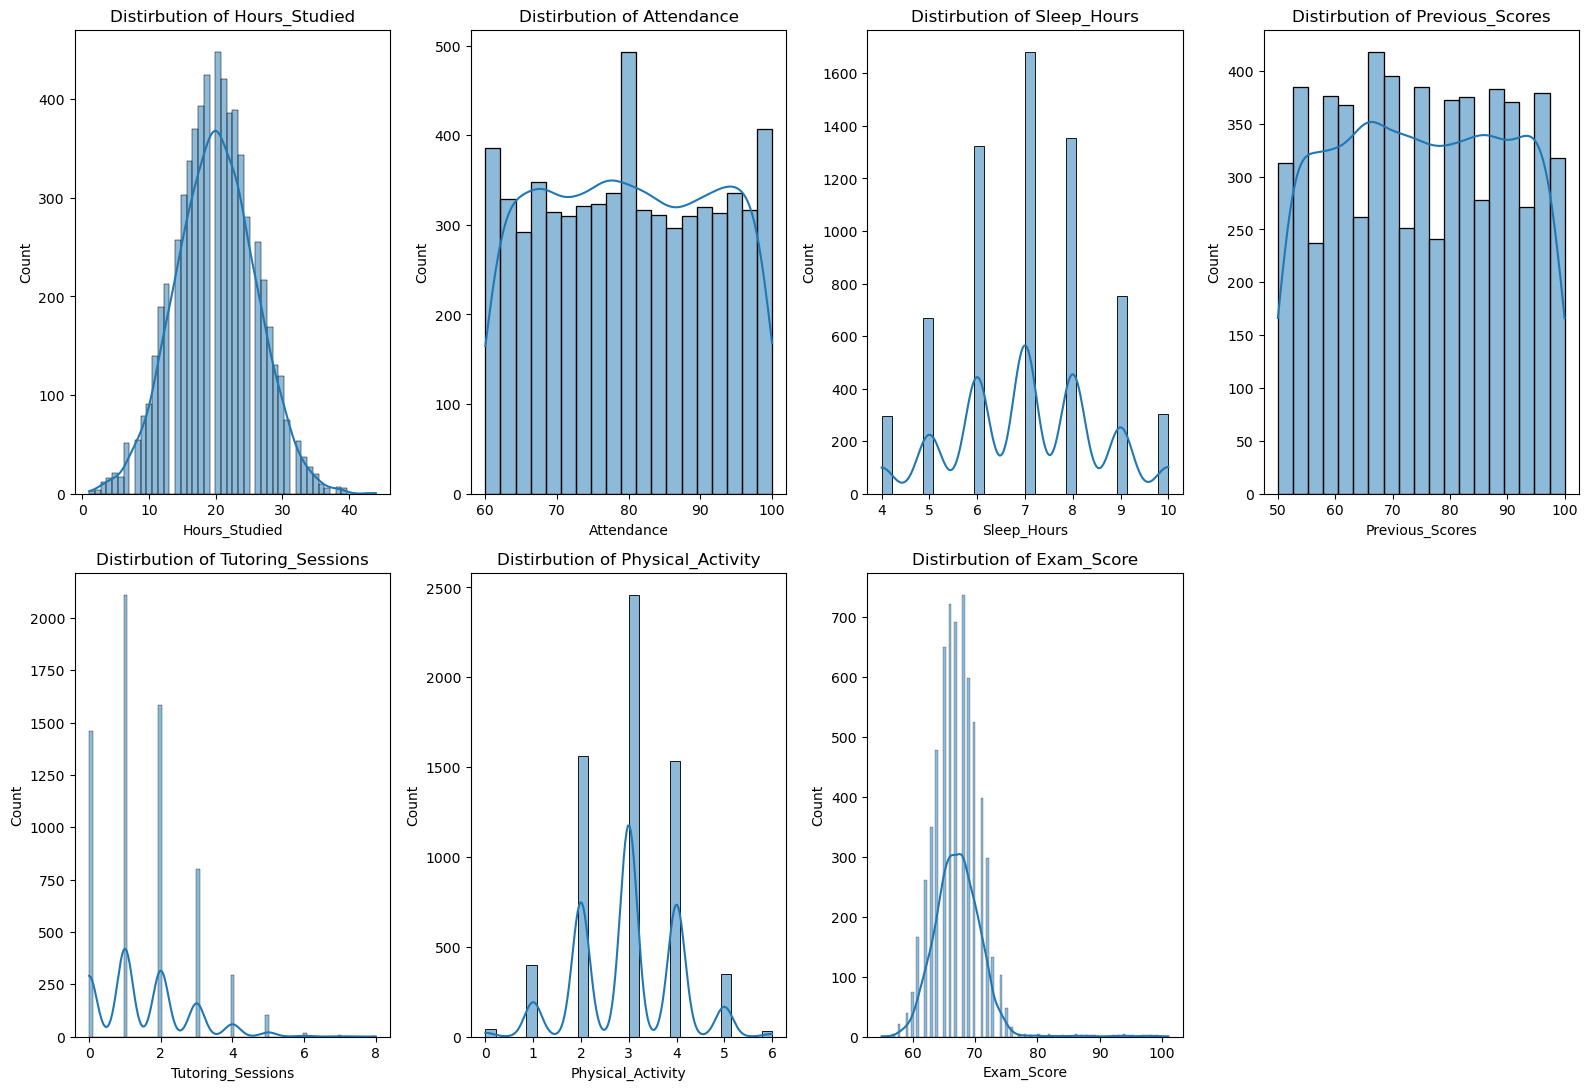

In [30]:
plot_distribution(numeric_types, "hist")

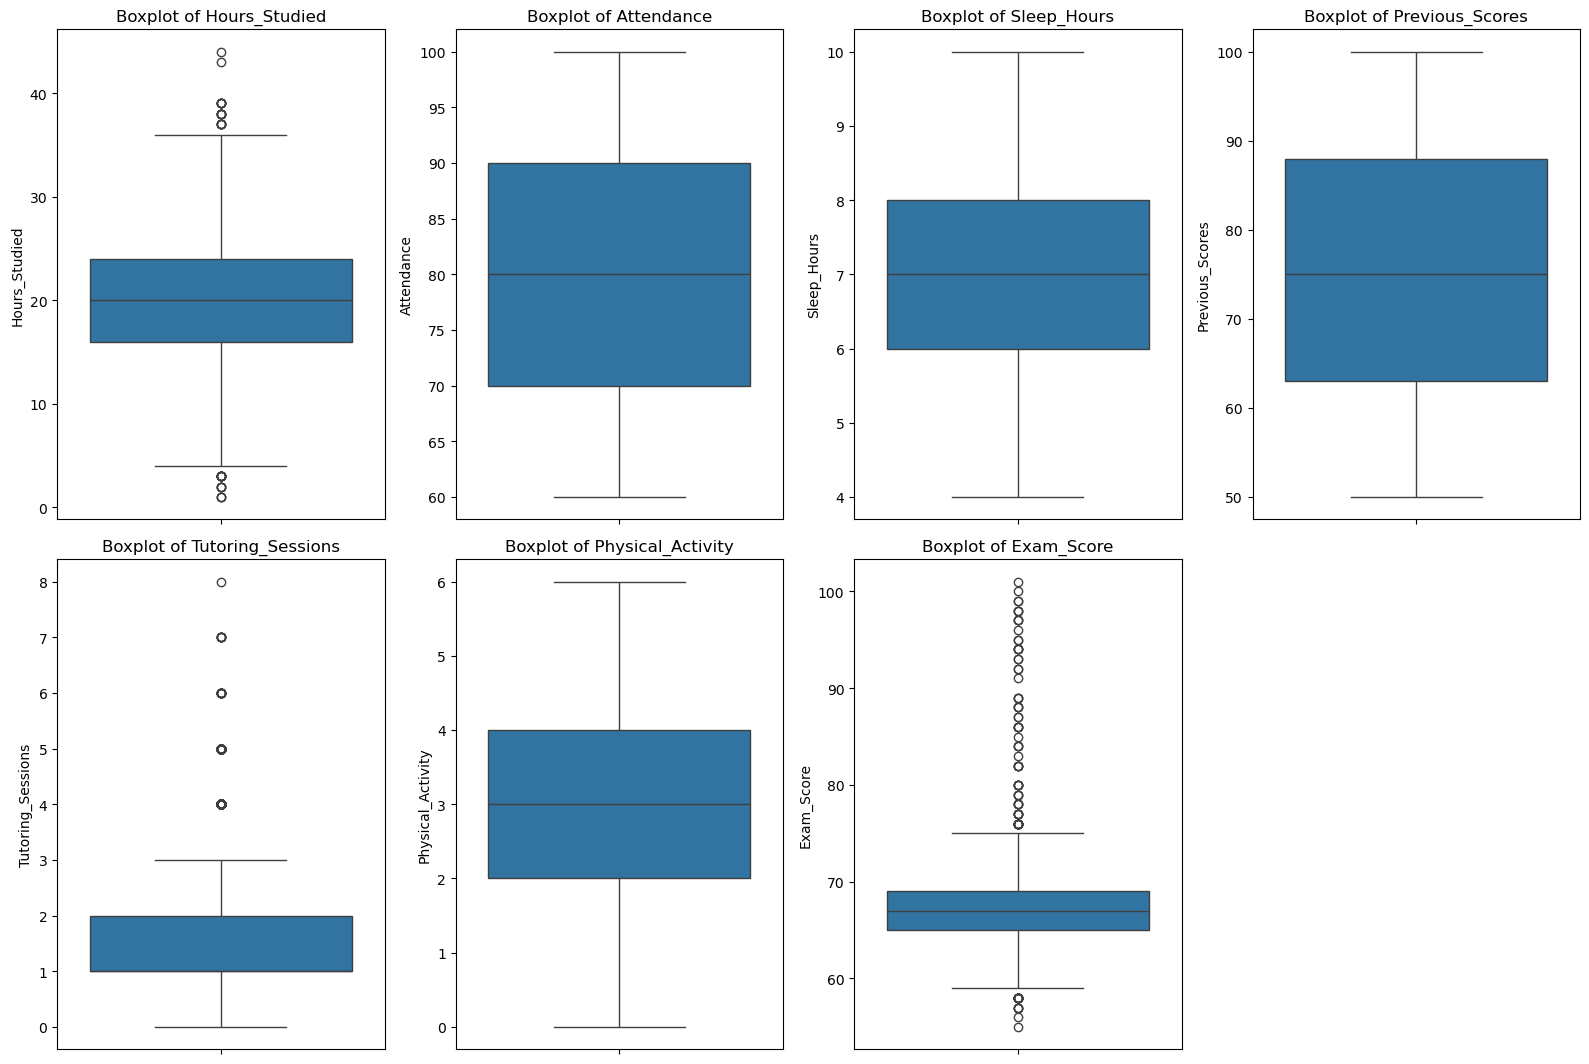

In [31]:
plot_distribution(numeric_types, "box")